In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("cleaned_dataset")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [10]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,0


In [12]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [15]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,0


In [16]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [17]:
corr_feature = correlation(X_train,0.85)

In [18]:
corr_feature

{'BUI', 'DC'}

In [19]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [21]:
X_train_scaler

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526,  0.        ],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  0.        ],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  0.        ],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526,  0.        ],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  0.        ],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526,  0.        ]])

Text(0.5, 1.0, 'X Train after Scaling')

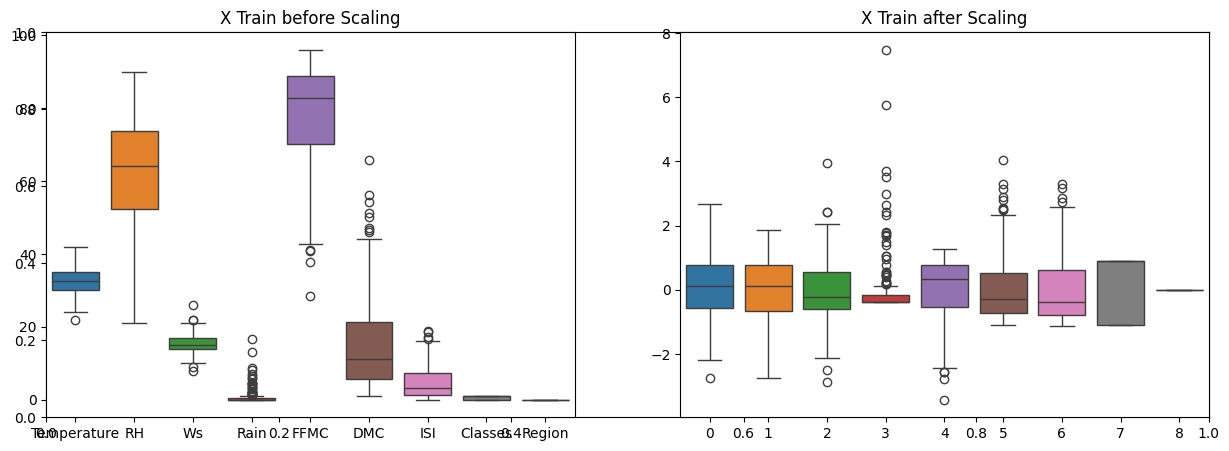

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X Train before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaler)
plt.title('X Train after Scaling')

mean_absolute_error 0.5842707645701569
r2 score 0.9818991727411215


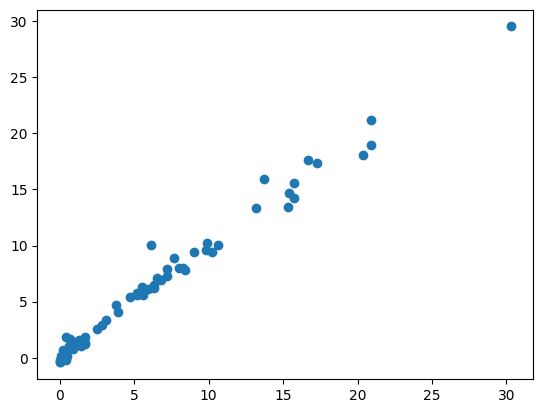

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaler,y_train)
y_pred= linreg.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

mean_absolute_error 1.133175994914409
r2 score 0.9492020263112388


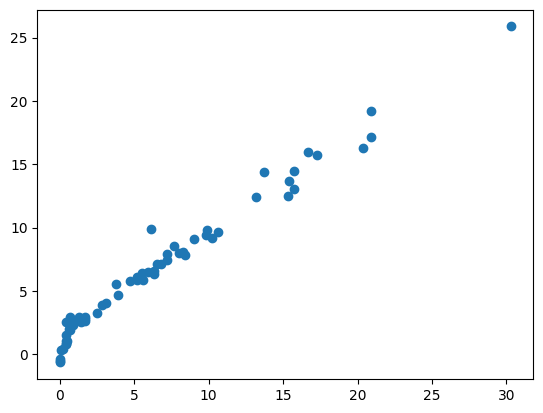

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
las = Lasso()
las.fit(X_train_scaler,y_train)
y_pred= las.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

In [27]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaler,y_train)


LassoCV(cv=5)

mean_absolute_error 0.8264308494715196
r2 score 0.9710414687002776


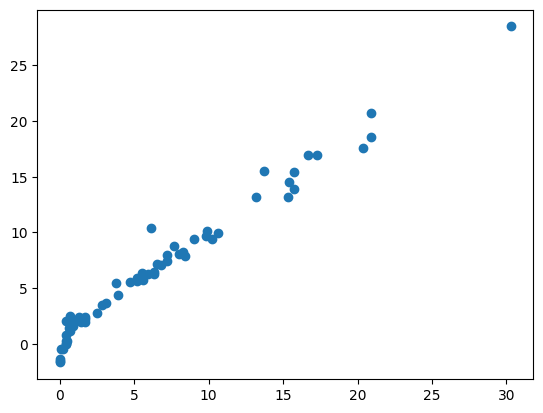

In [28]:

y_pred= lassocv.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

mean_absolute_error 0.6006561235951375
r2 score 0.9813046839382391


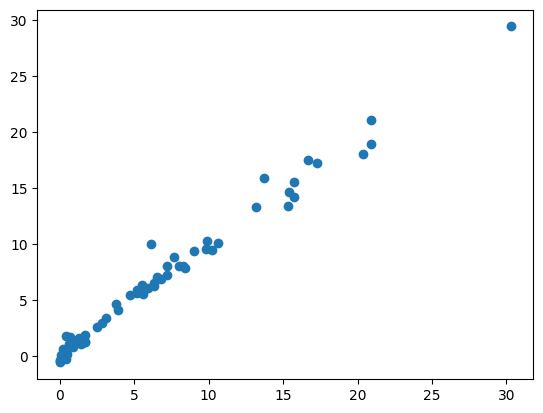

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaler,y_train)
y_pred= ridge.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

mean_absolute_error 0.8057412365870246
r2 score 0.9734404349609262


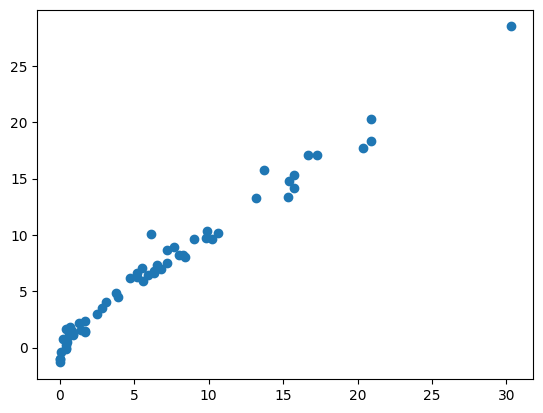

In [30]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaler,y_train)
y_pred= ridgecv.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

mean_absolute_error 0.7245910057301369
r2 score 0.9769642275571065


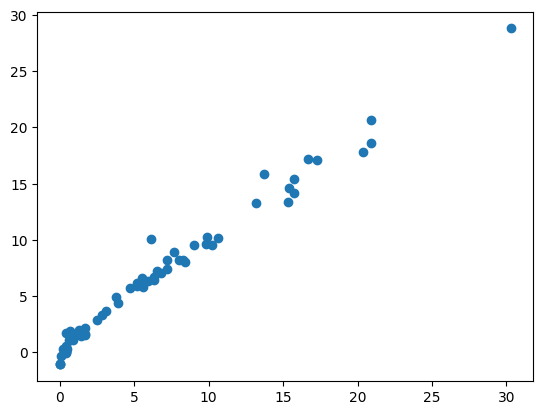

In [31]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaler,y_train)
y_pred= elasticcv.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

In [32]:
scaler

StandardScaler()

In [33]:
ridge

Ridge()

In [34]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))